In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
#leemos los datos meteorologicos
df=pd.read_csv("meteo-vid-2018.csv",engine="python")

#le pedimos que se desaga de las columnas sin info
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [376]:
#unimos dos columnas la de DATE y TIME
df['FECHA'] = df['Date'].str.cat(df['Time'],sep=" ")

df.drop(['Date', 'Time'],axis=1,inplace=True) #Me deshago de las columnas que ya no utilizare 
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True) #Convierto la columna Fecha al tipo datetime
df=df[df['FECHA']<'2019-01-01']

In [377]:
df=df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)


In [378]:
df['AÑO']=df['FECHA'].dt.year 
df['MES']=df['FECHA'].dt.month 
df['DIA']=df['FECHA'].dt.day  
df['MIN']=df['FECHA'].dt.minute  
df['HORA']=df['FECHA'].dt.hour 

In [379]:
df1=pd.DataFrame({
    "WS_ms_S_WVT": df["WS_ms_S_WVT"],
    "AirTC_Avg": df["AirTC_Avg"],
    "RH": df["RH"],
    "Rn_Avg": df["Rn_Avg"],
    "FECHA":df["FECHA"],
    "AÑO":df["AÑO"],
    "MES":df["MES"]
})


In [380]:
df2=pd.DataFrame({
"vel_prom":df1.groupby(['AÑO','MES'])["WS_ms_S_WVT"].mean(),
"Tmax":df1.groupby(['AÑO','MES'])["AirTC_Avg"].max(),
"Tmin":df1.groupby(['AÑO','MES'])["AirTC_Avg"].min(),
"Tprom":df1.groupby(['AÑO','MES'])["AirTC_Avg"].mean(),
"RHmax":df1.groupby(['AÑO','MES'])["RH"].max(),
"RHmin":df1.groupby(['AÑO','MES'])["RH"].min(),
"RHprom":df1.groupby(['AÑO','MES'])["RH"].mean(),
"Rs":df1.groupby(['AÑO','MES'])["Rn_Avg"].mean()
    })

In [381]:
latitud=[]
longitud=[]
altitud=[]

lat=0.504725
lon=1.942737
alt=101

for i in df2.index:
    latitud.append(lat)
    longitud.append(lon)
    altitud.append(alt)
    



In [382]:
MES=["Enero","Feberero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

In [413]:
df2["latitud"]=latitud
df2["longitud"]=longitud
df2["altitud"]=altitud
df2["MES"]=MES
df2

vel_prom   Tmax   Tmin      Tprom  RHmax  RHmin     RHprom  \
AÑO  MES                                                               
2018 1    1.944333  33.35   0.54  16.971598  91.60   5.98  38.450544   
     2    1.964189  31.47   0.07  17.230275  99.53   6.76  48.168006   
     3    1.926196  35.22   3.06  19.282359  89.73   6.76  36.968353   
     4    2.101812  36.30   5.43  21.880618  93.40   5.23  40.785667   
     5    2.113918  38.18   7.13  23.650034  94.60   8.19  44.233468   
     6    2.154986  41.47  13.12  28.416187  98.37   5.34  50.810507   
     7    2.022204  44.94  18.71  31.065726  97.00  13.10  57.639805   
     8    1.910853  40.24  22.71  30.120894  98.60  30.16  68.868454   
     9    1.790326  41.39  19.43  29.661271  98.03  21.32  66.619750   
     10   1.664435  35.82  10.23  23.254207  98.47  17.32  68.696082   
     11   1.498097  32.39   2.47  16.966396  99.43   8.75  58.085458   
     12   1.628730  31.86  -1.34  14.332823  97.33   8.04  58.333938   

                  Rs   latitud  longitud  altitud         MES  
AÑO  MES                                                       
2018 1     34.802554  0.504725  1.942737      101       Enero  
     2     56.250350  0.504725  1.942737      101    Feberero  
     3     92.894913  0.504725  1.942737      101       Marzo  
     4    134.012965  0.504725  1.942737      101       Abril  
     5    162.405343  0.504725  1.942737      101        Mayo  
     6    163.926069  0.504725  1.942737      101       Junio  
     7    157.534402  0.504725  1.942737      101       Julio  
     8    151.273589  0.504725  1.942737      101      Agosto  
     9    136.749910  0.504725  1.942737      101  Septiembre  
     10    95.513468  0.504725  1.942737      101     Octubre  
     11    60.384285  0.504725  1.942737      101   Noviembre  
     12    44.962366  0.504725  1.942737      101   Diciembre

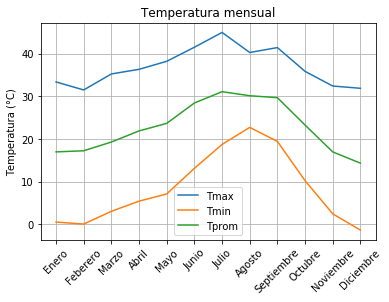

In [414]:
graf1 = df2[['Tmax','Tmin','Tprom']]
plt.plot(range(0,12),graf1)
plt.title("Temperatura mensual")
plt.ylabel("Temperatura (°C)")
plt.legend(graf1)
plt.grid()
plt.xticks(np.arange(12),df2["MES"],rotation=45)
plt.savefig("Tempmens", plt = 2000)
plt.show()


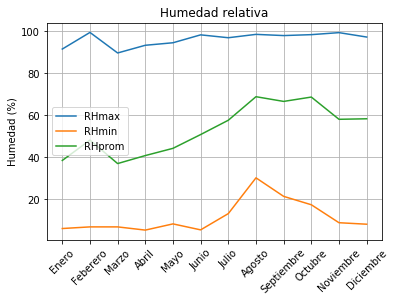

In [415]:
graf1 = df2[['RHmax','RHmin','RHprom']]
plt.plot(range(0,12),graf1)
plt.title("Humedad relativa")
plt.ylabel("Humedad (%)")
plt.legend(graf1)
plt.grid()
plt.xticks(np.arange(12),df2["MES"],rotation=45)
plt.savefig("Humedadrelativa", plt = 2000)
plt.show()

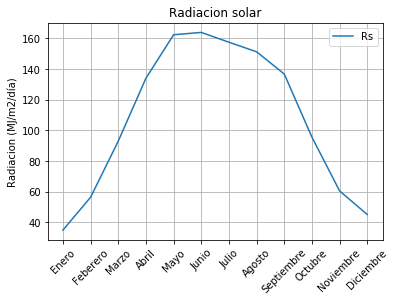

In [416]:
graf1 = df2[['Rs']]
plt.plot(range(0,12),graf1)
plt.title("Radiacion solar")
plt.ylabel("Radiacion (MJ/m2/día)")
plt.legend(graf1)
plt.grid()
plt.xticks(np.arange(12),df2["MES"],rotation=45)
plt.savefig("radsolar", plt = 2000)
plt.show()

In [387]:
df3= pd.DataFrame({
"vel_prom":df.groupby(['AÑO','MES','DIA'])["WS_ms_S_WVT"].mean(),
"Tmax":df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].max(),
"Tmin":df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].min(),
"Tprom":df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].mean(),
"RHmax":df.groupby(['AÑO','MES','DIA'])["RH"].max(),
"RHmin":df.groupby(['AÑO','MES','DIA'])["RH"].min(),
"RHprom":df.groupby(['AÑO','MES','DIA'])["RH"].mean(),
"Rs":df.groupby(['AÑO','MES','DIA'])["Rn_Avg"].mean()
    
})

In [388]:
df['albedo_Avg']=df["albedo_Avg"].apply(pd.to_numeric, errors='coerce')

In [389]:
df5=df

In [390]:


df5["vel_prom"]=df.groupby(['AÑO','MES','DIA'])["WS_ms_S_WVT"].transform('mean')
df5["Tmax"]=df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].transform('max')
df5["Tmin"]=df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].transform('min')
df5["Tprom"]=df.groupby(['AÑO','MES','DIA'])["AirTC_Avg"].transform('mean')
df5["RHmax"]=df.groupby(['AÑO','MES','DIA'])["RH"].transform('max')
df5["RHmin"]=df.groupby(['AÑO','MES','DIA'])["RH"].transform('min')
df5["RHprom"]=df.groupby(['AÑO','MES','DIA'])["RH"].transform('mean')
df5["Rs"]=df.groupby(['AÑO','MES','DIA'])["Rn_Avg"].transform('mean')
df5["albedo_Avg"]=df.groupby(['AÑO','MES','DIA'])["albedo_Avg"].transform('mean')


In [391]:
df5=df5.drop_duplicates(subset=['MES','DIA'] ,keep='first',inplace=False)

In [392]:
df5=df5.reset_index()

In [393]:
df5=df5[['FECHA','albedo_Avg','vel_prom','Tmax','Tmin','Tprom','RHmax','RHmin','RHprom','Rs','MES','DIA','HORA']]

In [395]:
def d(J):
    return 1+0.033*np.cos(2/365*np.pi*J)

def delta(J):
    return 0.409*np.sin(2*np.pi/365*J - 1.39)

def w(s):
    return np.arccos(-1*np.tan(lat)*np.tan(delta(s)))
    
def Ra(j):
    return 24*60/np.pi*(0.082)*d(j)*(w(j)*np.sin(lat)*np.sin(delta(j)) + np.cos(lat)*np.sin(w(j)))

def JH(t,rs):
    return (0.0252*t + 0.078) * rs

def val1(rs,tmean,phi,tmin):
    return (0.0393*rs*(tmean + 9.5)**(0.5) - 0.19*rs**(0.6) * phi**(0.15) + 
            0.0061*(tmean + 20)*(1.12*tmean - tmin - 2)**(0.7))
def val4(a,rs,tmean,dia,rh,u2,z): #u2 es la velocidad
    return (0.051*(1-a)*rs*(tmean + 9.5)**(0.5) - 2.4*(rs/Ra(dia))**2 + 
            0.048*(tmean + 20)*(1 - rh/100)*(0.5 + 0.536*u2) + 0.00012*z)

In [396]:
ET1=[]
ET2=[]
ET3=[]
phi0=lat
z0=alt


for i in df5.index:
    ET1.append( JH(df5["Tprom"][i],df5["Rs"][i]))
    ET2.append( val1(df5["Rs"][i],df5["Tprom"][i],phi0,df5["Tmin"][i]))
    ET3.append( val4(df5["albedo_Avg"][i],df5["Rs"][i],df5["Tprom"][i],i+7,df5["RHprom"][i],df5["vel_prom"][i],z0))
    
        


C:\Users\JESUS MEDINA\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [397]:
df5['ET1']=ET1
df5['ET2']=ET2
df5['ET3']=ET3

In [398]:
df5['ET2'] = df5['ET2'].fillna(0)

In [399]:
df6=df5

In [400]:
df6["vel_prom"]=df5.groupby(['MES'])["vel_prom"].transform('mean')
df6["Tmax"]=df5.groupby(['MES'])["Tmax"].transform('mean')
df6["Tmin"]=df5.groupby(['MES'])["Tmin"].transform('mean')
df6["Tprom"]=df5.groupby(['MES'])["Tprom"].transform('mean')
df6["RHmax"]=df5.groupby(['MES'])["RHmax"].transform('mean')
df6["RHmin"]=df5.groupby(['MES'])["RHmin"].transform('mean')
df6["RHprom"]=df5.groupby(['MES'])["RHprom"].transform('mean')
df6["Rs"]=df5.groupby(['MES'])["Rs"].transform('mean')
df6["albedo_Avg"]=df5.groupby(['MES'])["albedo_Avg"].transform('mean')
df6["ET1"]=df5.groupby(['MES'])["ET1"].transform('mean')
df6["ET2"]=df5.groupby(['MES'])["ET2"].transform('mean')
df6["ET3"]=df5.groupby(['MES'])["ET3"].transform('mean')

In [401]:
df6=df6.drop_duplicates(subset='MES',keep='first')
df6=df6.reset_index()

In [412]:
df6.head()

,index,FECHA,albedo_Avg,vel_prom,Tmax,Tmin,Tprom,RHmax,RHmin,RHprom,Rs,MES,DIA,HORA,ET1,ET2,ET3
0,0,2018-01-06 17:00:00,-0.414921,1.941529,27.368077,7.733462,17.074827,65.835000,14.195385,38.372184,32.917208,1,6,17,16.649192,6.581189,8.739703
1,26,2018-02-01 00:00:00,-0.479797,1.964189,25.320357,9.433214,17.230275,72.542857,25.725357,48.168006,56.250350,2,1,0,27.831158,10.302332,11.996951
2,54,2018-03-01 00:00:00,-0.409282,1.926196,29.519355,8.883548,19.282359,68.361613,15.204839,36.968353,92.894913,3,1,0,52.703909,18.273990,17.306774
3,85,2018-04-01 00:00:00,-0.386051,2.101813,32.671667,10.781667,21.880618,76.585000,15.712333,40.785667,134.012965,4,1,0,84.551798,27.715380,24.494133
4,115,2018-05-01 00:00:00,-0.367493,2.113918,34.133548,12.781290,23.650034,79.971935,17.229032,44.233468,162.405343,5,1,0,109.611487,34.607619,30.877853


In [402]:
#leemos los datos meteorologicos
dg=pd.read_csv("flujos-vid-2018.csv",engine="python")

#le pedimos que se desaga de las columnas sin info
dg=dg.loc[:, ~df.columns.str.contains('^Unnamed')]
dg=dg.drop(df.index[0])



In [403]:
DATA=(np.asarray(dg['Year'], dtype='datetime64[Y]'))+(np.asarray(dg['DoY'], dtype='timedelta64[D]')-1)

In [404]:
DATA

array(['2018-01-07', '2018-01-07', '2018-01-07', ..., '2018-12-31',
       '2018-12-31', '2018-12-31'], dtype='datetime64[D]')

In [405]:
dg['DATA']=DATA

In [406]:
dg['MES']=dg['DATA'].dt.month

In [407]:
dg=dg[dg['MES']==2]
tempd = dg["DATA"]
dg[dg.columns]=dg[dg.columns].apply(pd.to_numeric,errors='coerce')
dg["DATA"] = tempd

In [408]:
dg1=pd.DataFrame([])
dg1['Rn_G'] =dg.groupby(['Hour'])['Rg_f'].transform('mean')
dg1['lambda_ET'] =dg.groupby(['Hour'])['LE_f'].transform('mean')
dg1['H'] =dg.groupby(['Hour'])['H_f'].transform('mean')
dg1['Hour']=dg['Hour']

In [409]:
dg1=dg1.drop_duplicates()
dg1=dg1.reset_index()

In [410]:
dg1=dg1.drop(['index'],axis=1,inplace=False)

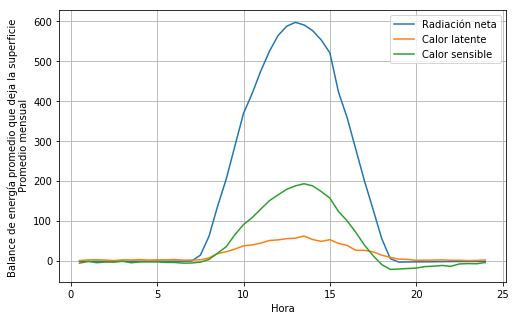

In [411]:
plt.figure(1, figsize=(8, 5))

plt.plot(dg1.Hour, dg1.Rn_G)
plt.plot(dg1.Hour, dg1.lambda_ET)
plt.plot(dg1.Hour, dg1.H)

plt.ylabel("Balance de energía promedio que deja la superficie \n Promedio mensual")
plt.xlabel("Hora")
plt.gca().legend(('Radiación neta','Calor latente',"Calor sensible"))
plt.grid(True)
plt.savefig("BalEne", plt = 2000)
plt.show()